# Suppor Vector Machines
Algorithms for both *classification* and *regression*. Are an example of *discriminative classification*: rather than modeling each calss, we simply find a line or curve (in two dimensions) or manifold (multiple dimensions) that devides the classes from each other.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set_theme()

from sklearn.datasets._samples_generator import make_blobs
from sklearn.svm import SVC

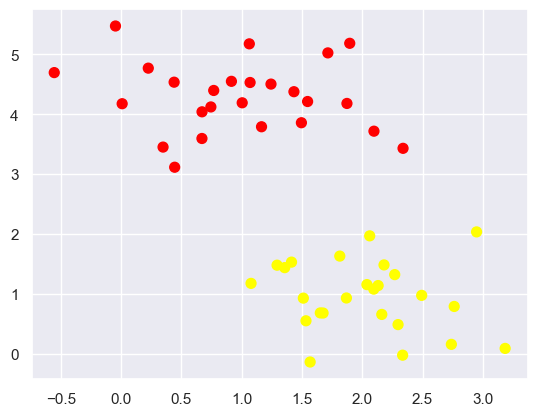

In [6]:
# creating some data
X, y = make_blobs(n_samples=50,
                  centers=2,
                  random_state=0,
                  cluster_std=0.6)

# visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

For separating the clusters:
- straight line the two sets
- more than one possbility

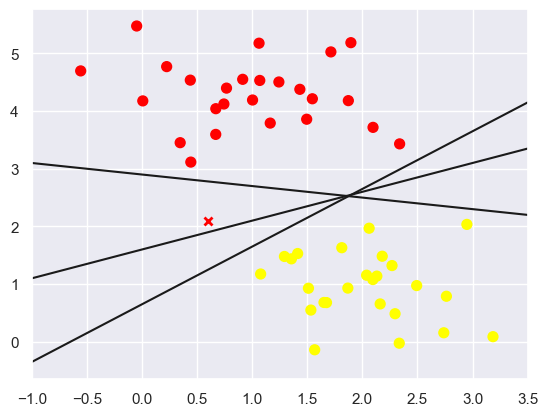

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit + b, 'k')
plt.xlim(-1, 3.5);

## Maximizing the *Margin*
Rather than just drawing a zero-width line, we can draw around each line a margin of some width.

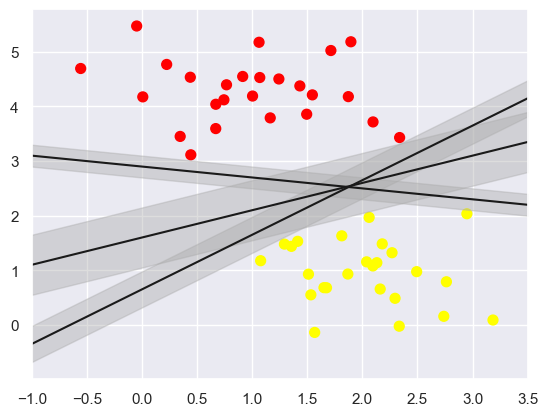

In [11]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)
plt.xlim(-1, 3.5);

## Fitting a Support Vector Machine
Using the SVM model and set the `C` parameter to very large number.

In [13]:
model = SVC(kernel='linear', C=1E10)
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [18]:
# just for practice, create a function to see results from SVC
def plot_svc(model, ax=None, plot_support=True):
    if ax is None:
        ax =  plt.gca() # get current axis
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # decision boundary and margins
    ax.contour(X,Y,P, colors='k',
               levels=[-1,0,1], 
               alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plotting suppor vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


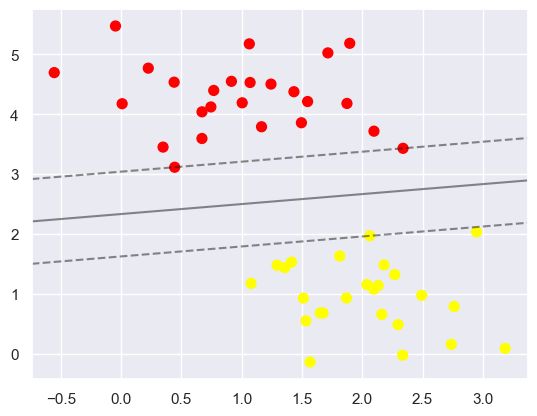

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc(model);

A few points just touch the margin, these points are pivotal elements of this fit, and are known as *support vectors*.

In [21]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

**key for the fit**: only the position of the support matters, any points further from the margin are on the correct side do not modify the fit, i.e., don't contribute to the loss function used to fit the model.

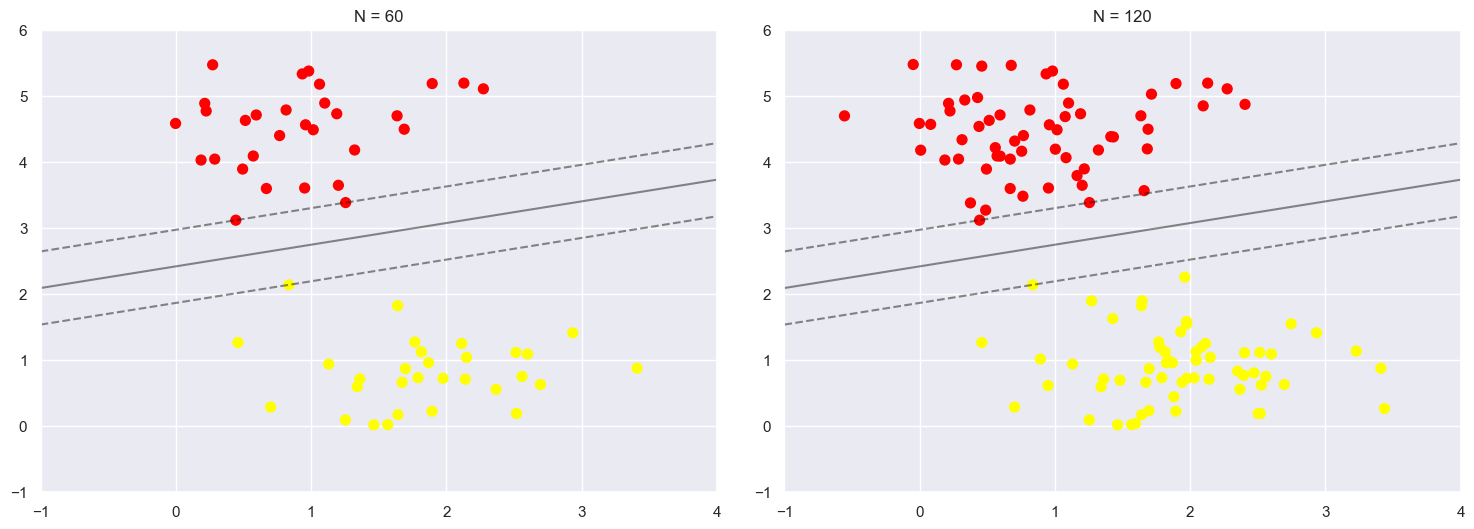

In [23]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

- Left panel: support vectors for 60 training points
- Right panel: doubled the first one, but **the model hasn't changed**!
- The three support vectors from the right panel are the same of the left one.

In [25]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 500], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 500), value=10), Output()), _dom_classes=('widget…